In [20]:
import pandas as pd 

import matplotlib.pyplot as plt

import string
string.punctuation
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec
#algorithm used
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report




nltk.__version__
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('all')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading all: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [2]:
data=pd.read_csv("Restaurant_Reviews.csv")
data.head(7)

,Review,Liked
0,Wow... Loved this place.,Yes
1,Crust is not good.,No
2,Not tasty and the texture was just nasty.,No
3,Stopped by during the late May bank holiday of...,Yes
4,The selection on the menu was great and so wer...,Yes
5,Now I am getting angry and I want my damn pho.,No
6,Honeslty it didn't taste THAT fresh.,No


In [3]:
data.shape

(2220, 2)

In [4]:
data.describe()

,Review,Liked
count,2220,2220
unique,1610,2
top,The restaurant had clean and well-maintained f...,No
freq,31,1119


In [5]:
data['Liked'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
data.Liked.value_counts()

Liked
No     1119
Yes    1101
Name: count, dtype: int64

In [7]:
data['length'] = data['Review'].apply(len)
data.head()

,Review,Liked,length
0,Wow... Loved this place.,Yes,24
1,Crust is not good.,No,18
2,Not tasty and the texture was just nasty.,No,41
3,Stopped by during the late May bank holiday of...,Yes,87
4,The selection on the menu was great and so wer...,Yes,59


<Axes: ylabel='Frequency'>

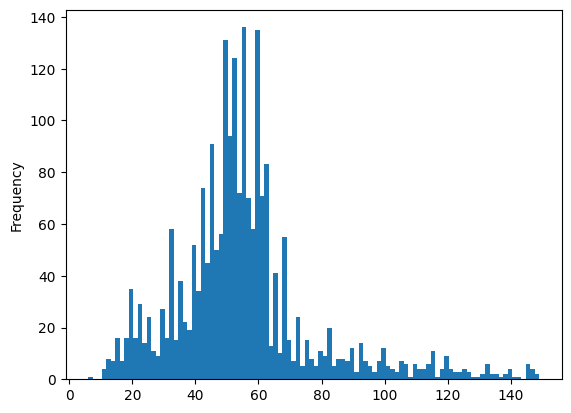

In [8]:
data['length'].plot(bins=100, kind='hist')

In [9]:
data.length.describe()

count    2220.000000
mean       55.281532
std        22.721595
min         6.000000
25%        44.000000
50%        53.000000
75%        61.000000
max       149.000000
Name: length, dtype: float64

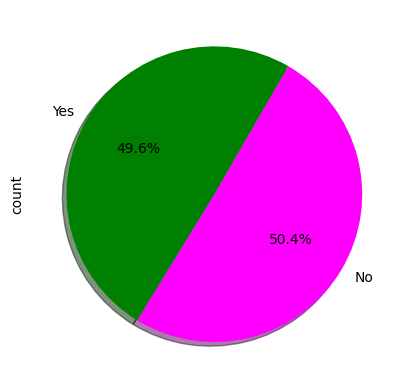

In [10]:
# Change pie chart colors here
colors = ["magenta", "green", "purple", "orange"]
data.Liked.value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show()

In [11]:
df=data.copy()

In [12]:
df['Review'] = df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['Review']=data['Review'].apply(lambda x: re.sub(r'\b(?:\w*\d\w*|\d+)\b', '', x))
df['Review'] = data['Review'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
df['Review'] = df['Review'].apply(lambda x: re.sub(r'\.', '', x))

In [13]:
df['Review']

0                                    Wow Loved this place
1                                       Crust is not good
2                Not tasty and the texture was just nasty
3       Stopped by during the late May bank holiday of...
4       The selection on the menu was great and so wer...
                              ...                        
2215    The staff was untrained and unfamiliar with th...
2216          The portions were skimpy and left us hungry
2217    The restaurant had unclean restrooms and unple...
2218    The waiters were slow and forgetful with our o...
2219          The food was poorly cooked and tasted burnt
Name: Review, Length: 2220, dtype: object

In [16]:
df['Review']=df['Review'].str.lower()

In [17]:
df.head()

,Review,Liked,length
0,wow loved this place,Yes,24
1,crust is not good,No,18
2,not tasty and the texture was just nasty,No,41
3,stopped by during the late may bank holiday of...,Yes,87
4,the selection on the menu was great and so wer...,Yes,59


In [21]:
stopwords=set(stopwords.words('english'))

In [22]:
def preprocess_text(text):
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word.lower() not in stopwords]
    return " ".join(tokens)


In [23]:
df['Review'] = df['Review'].apply(preprocess_text)

In [24]:
df['Review']

0                                         wow loved place
1                                              crust good
2                                     tasty texture nasty
3       stopped late may bank holiday rick steve recom...
4                             selection menu great prices
                              ...                        
2215                      staff untrained unfamiliar menu
2216                       portions skimpy left us hungry
2217        restaurant unclean restrooms unpleasant odors
2218                        waiters slow forgetful orders
2219                      food poorly cooked tasted burnt
Name: Review, Length: 2220, dtype: object

In [25]:

lemmatizer = WordNetLemmatizer()
def lemmatize_with_pos(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = tag[0].lower() if tag[0].lower() in ['a', 'n', 'v'] else 'n'  # Map POS tags to WordNet tags
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=pos))
    return ' '.join(lemmatized_tokens)



In [26]:

df['Review'] = df['Review'].apply(lemmatize_with_pos)
df.head(11)

,Review,Liked,length
0,wow love place,Yes,24
1,crust good,No,18
2,tasty texture nasty,No,41
3,stop late may bank holiday rick steve recommen...,Yes,87
4,selection menu great price,Yes,59
5,get angry want damn pho,No,46
6,honeslty n't taste fresh,No,36
7,potato like rubber could tell make ahead time ...,No,111
8,fry great,Yes,25
9,great touch,Yes,14


In [27]:
df['Review']

0                                          wow love place
1                                              crust good
2                                     tasty texture nasty
3       stop late may bank holiday rick steve recommen...
4                              selection menu great price
                              ...                        
2215                      staff untrained unfamiliar menu
2216                        portion skimpy leave u hungry
2217          restaurant unclean restroom unpleasant odor
2218                          waiter slow forgetful order
2219                        food poorly cook tasted burnt
Name: Review, Length: 2220, dtype: object

In [28]:
df['Liked'] = df['Liked'].map({'Yes': 1, 'No': 0})

In [29]:
X = df['Review']
y = df['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BOW

In [30]:
#CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)



In [31]:
classifier = RandomForestClassifier()
classifier.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [33]:
y_pred = classifier.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.8873873873873874


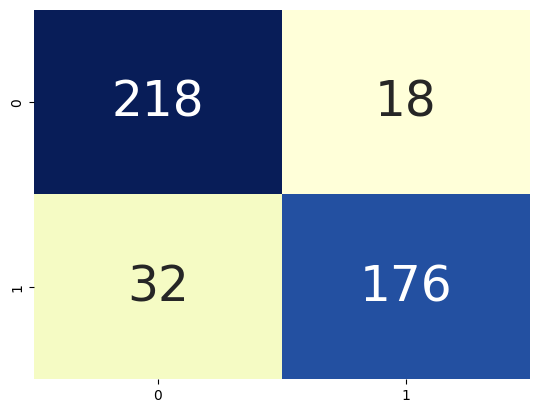

In [34]:

cm1= confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True,cbar=False,fmt="d",cmap="YlGnBu",annot_kws={"size": 35})
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       236
           1       0.91      0.85      0.88       208

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.89       444
weighted avg       0.89      0.89      0.89       444



In [36]:
#N-gram
ngram_vect = CountVectorizer(ngram_range=(1,3))
X_train_NGRAM = vectorizer.fit_transform(X_train)
X_test_NGRAM = vectorizer.transform(X_test)


In [37]:
classifier2 = RandomForestClassifier()
classifier2.fit(X_train_NGRAM, y_train)

RandomForestClassifier()

In [38]:
y_pred2 = classifier.predict(X_test_NGRAM)

In [39]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8873873873873874


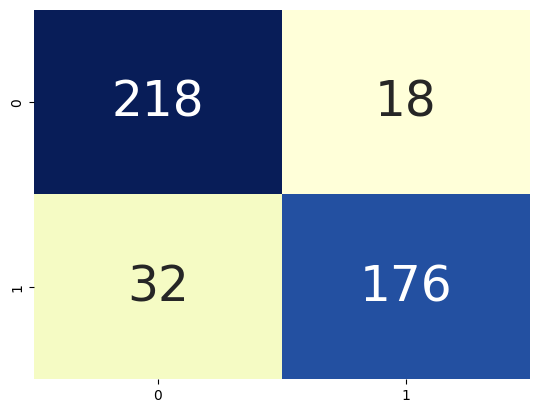

In [40]:
cm2= confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True,cbar=False,fmt="d",cmap="YlGnBu",annot_kws={"size": 35})
plt.show()

In [41]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       236
           1       0.91      0.85      0.88       208

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.89       444
weighted avg       0.89      0.89      0.89       444



In [42]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [43]:
classifier3 = RandomForestClassifier()
classifier3.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [44]:
y_pred3 = classifier3.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred3)

In [45]:
print("Accuracy:", accuracy)

Accuracy: 0.8716216216216216


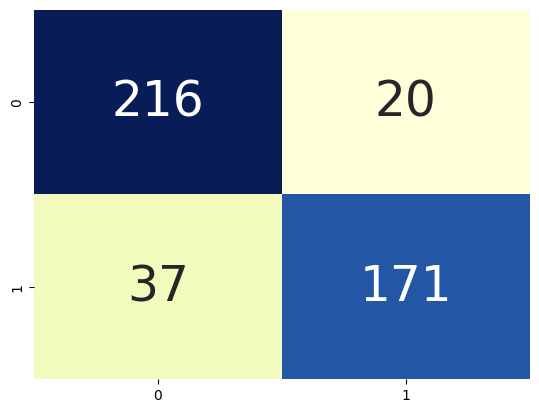

In [46]:
cm3= confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True,cbar=False,fmt="d",cmap="YlGnBu",annot_kws={"size": 35})
plt.show()

In [47]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       236
           1       0.90      0.82      0.86       208

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

